In [1]:
import os
import regfile

## Navigate to Event File and Display Image
- In the cell below, input the path to the event file
- Input 'sequenceID', mod ('A' or 'B'), and image scale ('lin' or 'log')
    - SL region is often more visible in log scale 
    - If a bright point source is present, proceed to **Point Source Removal**. If not, skip to **Determine Canny Edge $\sigma$**.

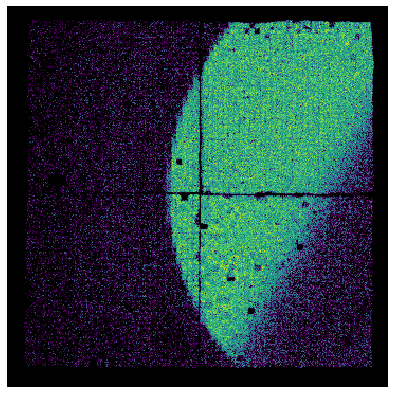

In [2]:
#define input path
input_path = 'example_data/'

#navigate to event file location
os.chdir(input_path)

#call lin or log image function
regfile.image('10110001002','A','log')

## Point Source Removal
 - Need to have sky2det file
 - Input 'sequenceID', mod ('A' or 'B'), arcminute limit of how much of the image to discard, and image scale ('lin' or 'log')
 - Function writes a new event file with the point source removed titled 'nu'+seqid+'filt'+mod+'01_cl.evt' to the input directory 
     - Use *this* file for the following steps (Canny Edge Detection, checking the region, and writing the region file)  

- If not all of the point source is cut out, increase the limit value. If a non negligible amount of the SL region is cut out, decrease the limit value. The filtered event file will be overwritten each time this function is re-run. 
 - Last resort: remove manually in DS9

In [3]:
#call point source removal function
regfile.filter_source(obsid,mod,limit,scale)

## Determine Canny Edge Detector $\sigma$
- In the cell below, input 'sequence ID', mod ('A' or 'b'), and energy cut values (emin and emax)
    - If a point source was removed, be sure to load in the new point source removed file 
    - Typically channels 36-209 (3-10keV) is best for energy cut 
- Run cell and choose first $\sigma$ from output plots that has SL region outlined and no detector edges (other than those the SL region touches) outlined. 
    - Some noise inside the SL region is OK, but it's ideal to avoid perimeter discontinuities AND minimize inner-region noise to avoid "zig-zagging" region as much as possible

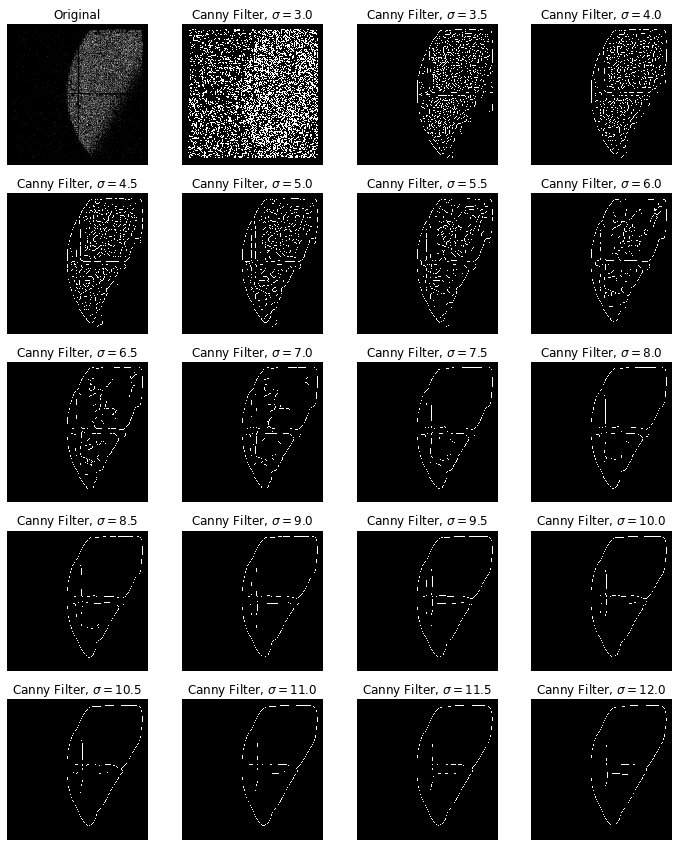

In [4]:
#call sigma range function
regfile.sigma_range('10110001002','A',36,209)

 - If you want to see whether a $\sigma$ in between two plotted values or a $\sigma>12$ would be optimal, call the single sigma function with your estimated value in the cell below

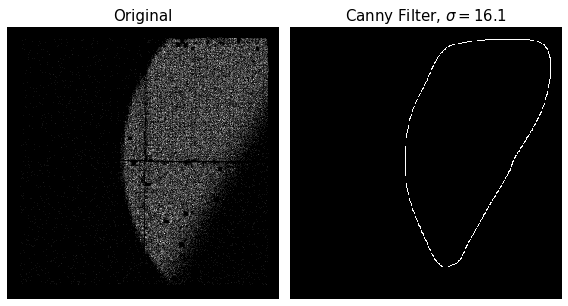

In [22]:
#call single sigma
regfile.sigma('10110001002','A',36,209,16.1)

## Check Region File
- Optional step: input'sequenceID', mod ('A' or 'B'), emin, emax, sigma, and image scale ('lin' or 'log') in the cell below to see what the region file looks like
    - If a point source was removed, be sure to load in the new point source removed file 
    - A sigma value that yields large discontinuities in the region perimeter may result in an array shape error here (which means writing a region file with this sigma would be bad!)
    - If the region file is not optimal, first try increasing the sigma value (can test using single sigma function or check function). If no sigma gives a good region file, try adjusting the energy cut band.

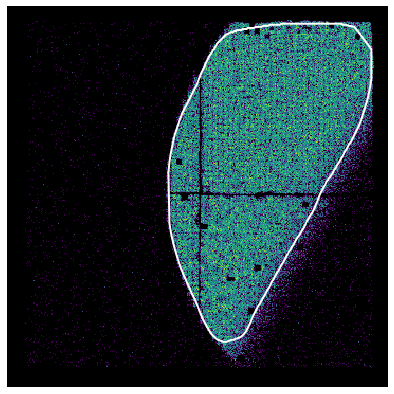

In [21]:
#call check function
regfile.check_region('10110001002','A',36,209,16.1,'log')

## Write Region File
- In the cell below, input the event file seqid, 'sequence ID', 'mod', emin, emax, sigma, 'output path', and 'name of region file'
    - If a point source was removed, be sure to load in the new point source removed file
    - good idea to include target name, seqID, and mod in region file title 

In [23]:
#call write function 
regfile.write_regfile('10110001002','A',36,209,16.1,'../example_data/','Crab_10110001002A.reg')


## Save Image w/ Region
- Optional step if you want a png of the image generated by check_region: input 'seqid','mod',emin,emax,sigma,scale,'output_path,' and 'name_of_image'
    - If a point source was removed, be sure to load in the new point source removed file

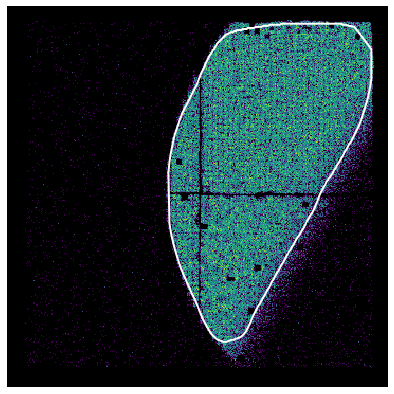

In [24]:
regfile.save_image('10110001002','A',36,209,16.1,'log','../example_data','Crab_10110001002A.png')
